Nama: Arya Nabil Hariri

NIM: 09021282429078


Kelas: L2 Angkatan 2024

# **Menentukan Kebutuhan Data**

**Identifikasi Tujuan:** Tujuan teknis dari proyek data science ini adalah untuk membangun model prediksi yang dapat memprediksi apakah seseorang memiliki penyakit diabetes mellitus.


**Kriteria Kebutuhan Data:** Untuk dapat membuat model prediksi penyakit diabetes mellitus, dibutuhkan data kesehatan dari orang yang menjadi sample. adapun data yang diperkirakan dibutuhkan adalah sebagai berikut:


1. Pregnancies: Jumlah kehamilan yang pernah dialami pasien. Riwayat kehamilan dapat memengaruhi risiko diabetes, terutama gestational diabetes (diabetes saat hamil).

2. Glucose: Konsentrasi glukosa plasma yang diukur 2 jam setelah tes toleransi glukosa oral. Nilai ini sangat penting untuk mendeteksi adanya hiperglikemia.

3. BloodPressure: Tekanan darah diastolik pasien (mmHg). Hipertensi sering menjadi komorbiditas yang berhubungan erat dengan diabetes.

4. SkinThickness: Ketebalan lipatan kulit trisep (mm). Digunakan sebagai indikator perkiraan lemak tubuh subkutan.

5. Insulin: Kadar insulin serum setelah 2 jam (mu U/ml). Dapat menunjukkan resistensi insulin atau masalah sekresi pankreas.

6. BMI (Body Mass Index): Indeks massa tubuh pasien, dihitung dari berat dan tinggi badan (kg/m²). Obesitas adalah faktor risiko utama untuk diabetes.

7. DiabetesPedigreeFunction: Skor yang menggambarkan riwayat keluarga terhadap diabetes, memperkirakan faktor hereditas dalam risiko penyakit.

8. Age: Usia pasien (tahun). Risiko terkena diabetes meningkat seiring bertambahnya usia.

9. Outcome: Variabel target / label biner. Nilai 1 menunjukkan pasien menderita diabetes mellitus, sedangkan 0 berarti tidak.

# **Memeriksa Ketersediaan Data**

**Sumber Data:** Sumber data dapat dari rumah sakit atau instansi kesehatan yang telah menyanggupi bekerjasama memberikan data atau dari pusat data di internet.

**Kepatuhan terhadap Aturan:** dengan bekerjasama dengan instansi kesehatan atau mengambil data dari data publik, seharusnya tidak terjadi pelanggaran aturan undang-undang berlaku

# **Menentukan Volume Kebutuhan Data**

**Estimasi Volume Data:** setidaknya dibutuhkan data kesehatan lebih dari 300 orang

**Pengumpulan Data:** Untuk proyek kali ini diputuskan untuk menggunakan data yang diunduh dari pusat data publik yaitu situs Kaggle.com

# **Mengambil Data**

**Metode dan Tools:** Data diunduh dalam bentu CSV. menggunakan library pandas pada python untuk mengimpor data dari file CSV.

**Metode dan Tools:** Melakukan import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/Colab Notebooks/diabetes.csv"
data_frame = pd.read_csv(file_path)

# **Mengintegrasikan Data**

Data yang digunakan adalah data CSV dari pusat data publik dalam bentuk 1 file yang tidak perlu diintegrasi lagi

# **Memvalidasi Data**

**Melakukan Pengecekan Kelengkapan Data**

banyak nilai yang hilang tetapi tidak ada data yg terduplikasi

In [ ]:
data_frame.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data_frame.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
col={'Outcome' : 'DiabetesDisease'}
data_frame.rename(columns=col, inplace=True)

# **Data Cleaning**

**a. Inspeksi Data**

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   DiabetesDisease           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesDisease
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**perbaikan kesalahan pengetikan dan mengubah label klasifikasi**

In [ ]:
for i in data_frame.columns:
    print('unique values in "{}":\n'.format(i),data_frame[i].unique())

unique values in "Pregnancies":
 [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
unique values in "Glucose":
 [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
unique values in "BloodPressure":
 [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
unique values in "SkinThickness":
 [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 

In [ ]:
for i in range(data_frame.shape[0]):
    if data_frame.loc[i,'DiabetesDisease']=='0\t':
        data_frame.loc[i,'DiabetesDisease']='0'
    if data_frame.loc[i,'DiabetesDisease'] in [' 1','\t1']:
        data_frame.loc[i,'DiabetesDisease']='1'

In [ ]:
data_frame.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesDisease
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1




```
# This is formatted as code
```

drop colom 'id' (tidak ada unique id yang perlu di-drop

In [ ]:
#data_frame.drop('id',axis=1,inplace=True)
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesDisease
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**memperbaiki kesalahan tipe data pada fitur**

In [ ]:
for i in data_frame.columns:
    print("unique values in {}:\n".format(i),data_frame[i].unique())

unique values in Pregnancies:
 [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
unique values in Glucose:
 [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
unique values in BloodPressure:
 [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
unique values in SkinThickness:
 [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 3

In [ ]:
mistyped=['BMI','BloodPressure','DiabetesPedigreeFunction','Insulin','Glucose', 'Pregnancies', 'Age', 'SkinThickness']
numeric=[]
for i in data_frame.columns:
    if data_frame[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [ ]:
for col in mistyped:
        data_frame[col]=data_frame[col].astype('float')

In [ ]:
print(data_frame['BMI'].unique())
print(data_frame['BloodPressure'].unique())
print(data_frame['DiabetesPedigreeFunction'].unique())
print(data_frame['Insulin'].unique())
print(data_frame['Glucose'].unique())
print(data_frame['Pregnancies'].unique())
print(data_frame['Age'].unique())
print(data_frame['SkinThickness'].unique())
# numeric.remove('DiabetesDisease')

data_frame.info()

[33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5  0.  37.6 38.  27.1 30.1
 25.8 30.  45.8 29.6 43.3 34.6 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2
 22.2 34.1 36.  31.6 24.8 19.9 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2
 22.7 45.4 27.4 42.  29.7 28.  39.1 19.4 24.2 24.4 33.7 34.7 23.  37.7
 46.8 40.5 41.5 25.  25.4 32.8 32.5 42.7 19.6 28.9 28.6 43.4 35.1 32.
 24.7 32.6 43.2 22.4 29.3 24.6 48.8 32.4 38.5 26.5 19.1 46.7 23.8 33.9
 20.4 28.7 49.7 39.  26.1 22.5 39.6 29.5 34.3 37.4 33.3 31.2 28.2 53.2
 34.2 26.8 55.  42.9 34.5 27.9 38.3 21.1 33.8 30.8 36.9 39.5 27.3 21.9
 40.6 47.9 50.  25.2 40.9 37.2 44.2 29.9 31.9 28.4 43.5 32.7 67.1 45.
 34.9 27.7 35.9 22.6 33.1 30.4 52.3 24.3 22.9 34.8 30.9 40.1 23.9 37.5
 35.5 42.8 42.6 41.8 35.8 37.8 28.8 23.6 35.7 36.7 45.2 44.  46.2 35.
 43.6 44.1 18.4 29.2 25.9 32.1 36.3 40.  25.1 27.5 45.6 27.8 24.9 25.3
 37.9 27.  26.  38.7 20.8 36.1 30.7 32.3 52.9 21.  39.7 25.5 26.2 19.3
 38.1 23.5 45.5 23.1 39.9 36.8 21.8 41.  42.2 34.4 27.2 36.5 29.8 39.2
 38.4 36.

**membuat array berisi fitur kategorical (dalam hal ini, dataset saya hanya memiliki satu fitur kategorical)**

In [ ]:
categoricals=[]
for col in data_frame.columns:
    if not col in numeric:
        categoricals.append(col)

**ada fitur kategorikal**

In [ ]:
categoricals

['DiabetesDisease']

**b. penanganan missing value**

**kita periksa dahulu distribusi data**

In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')

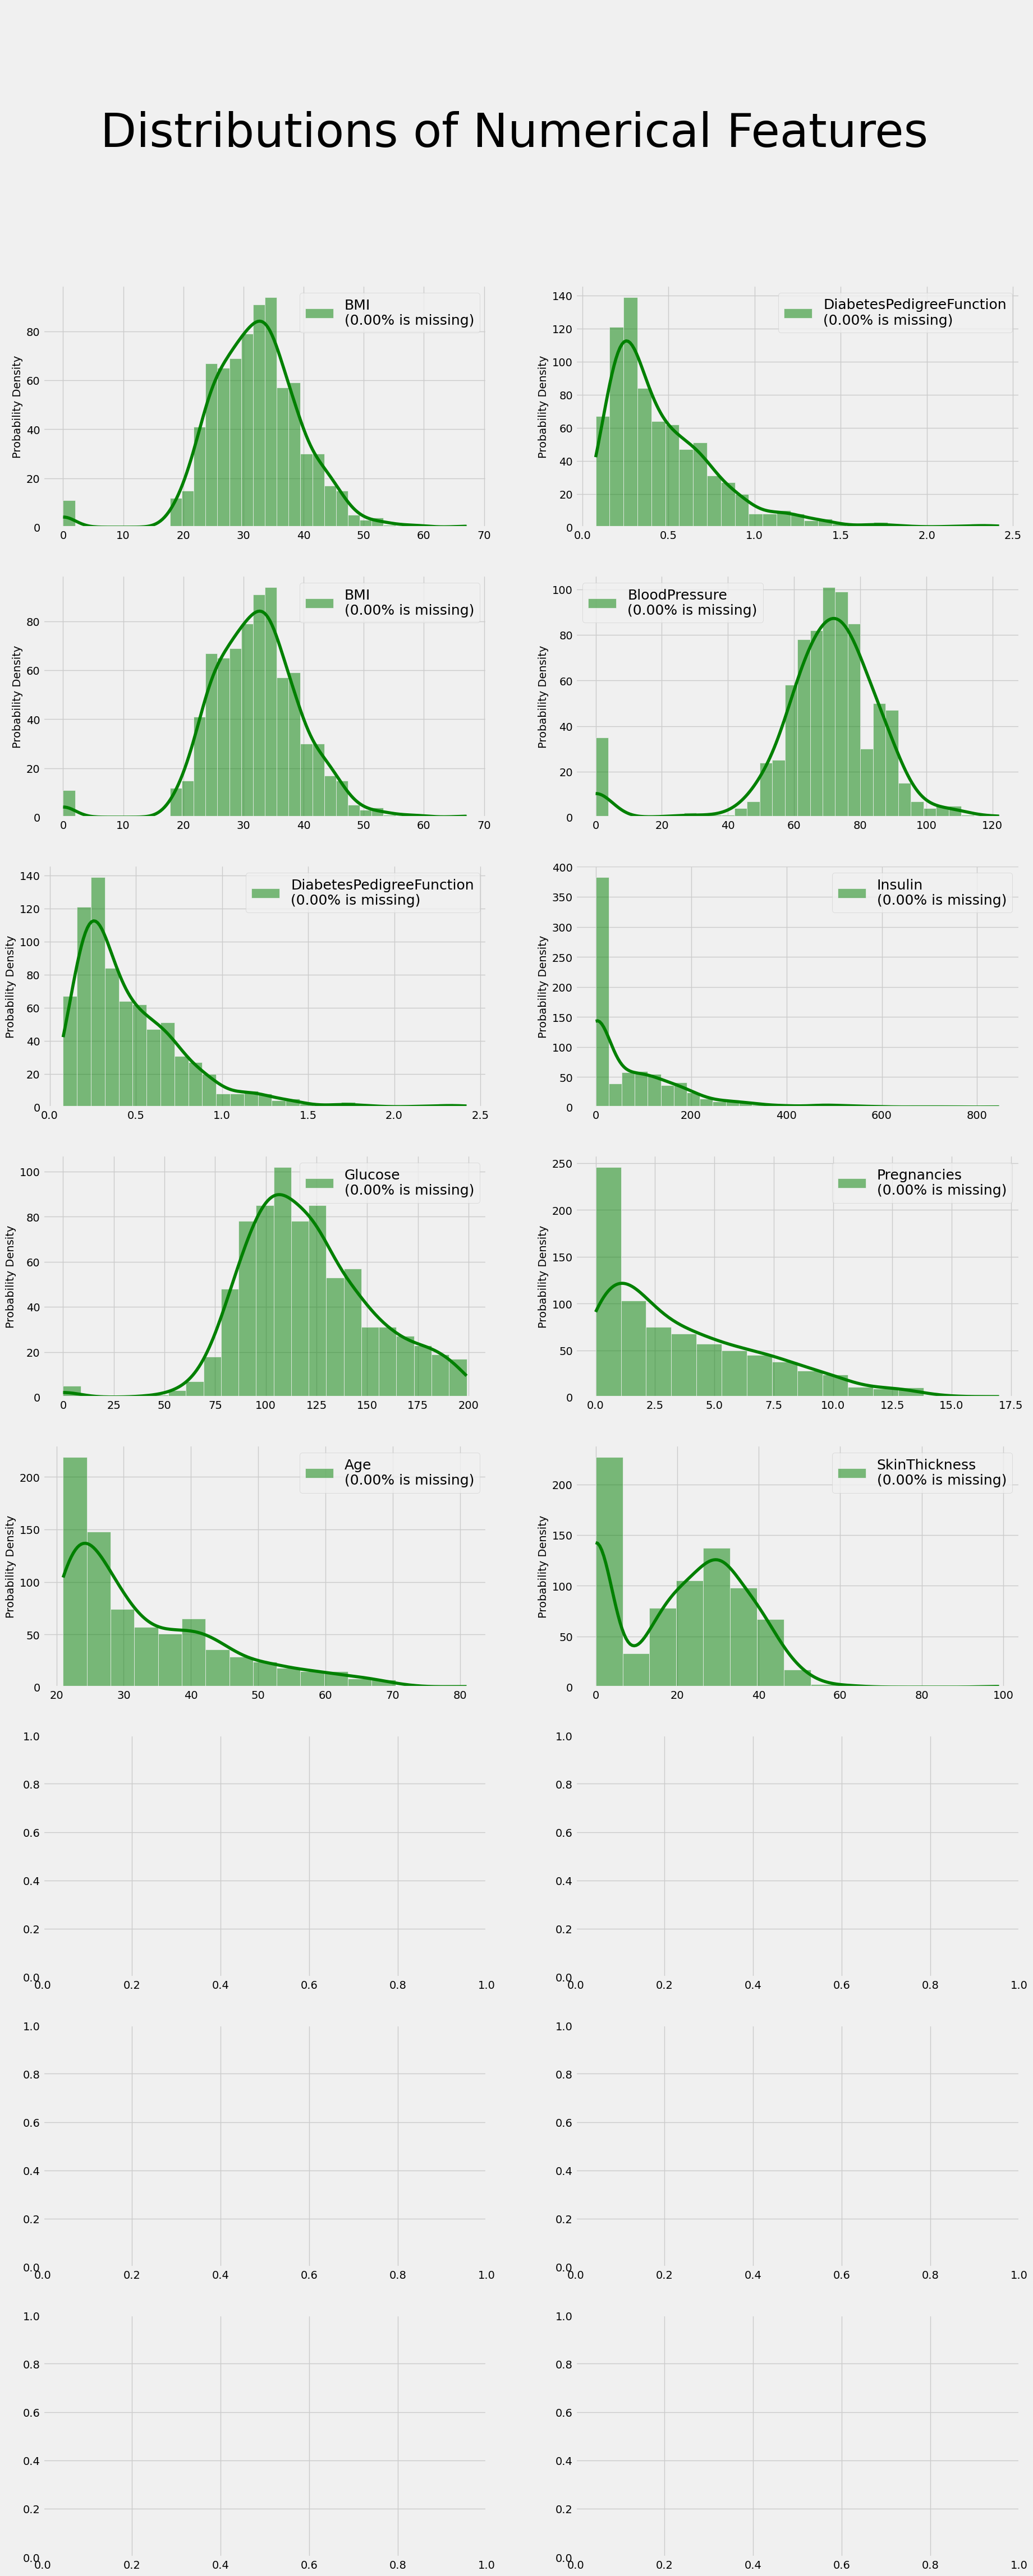

In [ ]:
n_rows, n_cols = (8,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):

    i,j = (index // n_cols), (index % n_cols)
    if i >= n_rows or j >= n_cols:
        print(f"Skipping column {column} at index {index} as it's out of bounds for the {n_rows}x{n_cols} grid.")
        continue


    miss_perc="%.2f"%(100*(1-(data_frame[column].dropna().shape[0])/data_frame.shape[0]))

    collabel=column+"\n({}% is missing)".format(miss_perc)

    fig=sns.histplot(data_frame[column], color="g", label=collabel, ax=axes[i,j], kde=True)

    fig=fig.legend(loc='best', fontsize=18)

    axes[i,j].set_ylabel("Probability Density",fontsize='medium')

    axes[i,j].set_xlabel(None)

plt.show()

Beberapa fitur menunjukkan beberapa outliers.
Beberapa memiliki nilai diskrit, tetapi akan diperlakukan seperti nilai kontinu.
Beberapa fitur memiliki "missing value" yang tinggi.

diatas adalah sebaran data untuk fitur numerik, berikut untuk fitur yang kategorikal

In [ ]:
style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-4029479776.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x=column, data=data_frame, label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
/tmp/ipython-input-4029479776.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  fig = sns.countplot(x=column, data=data_frame, label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
/tmp/ipython-input-4029479776.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), fontsize=12)


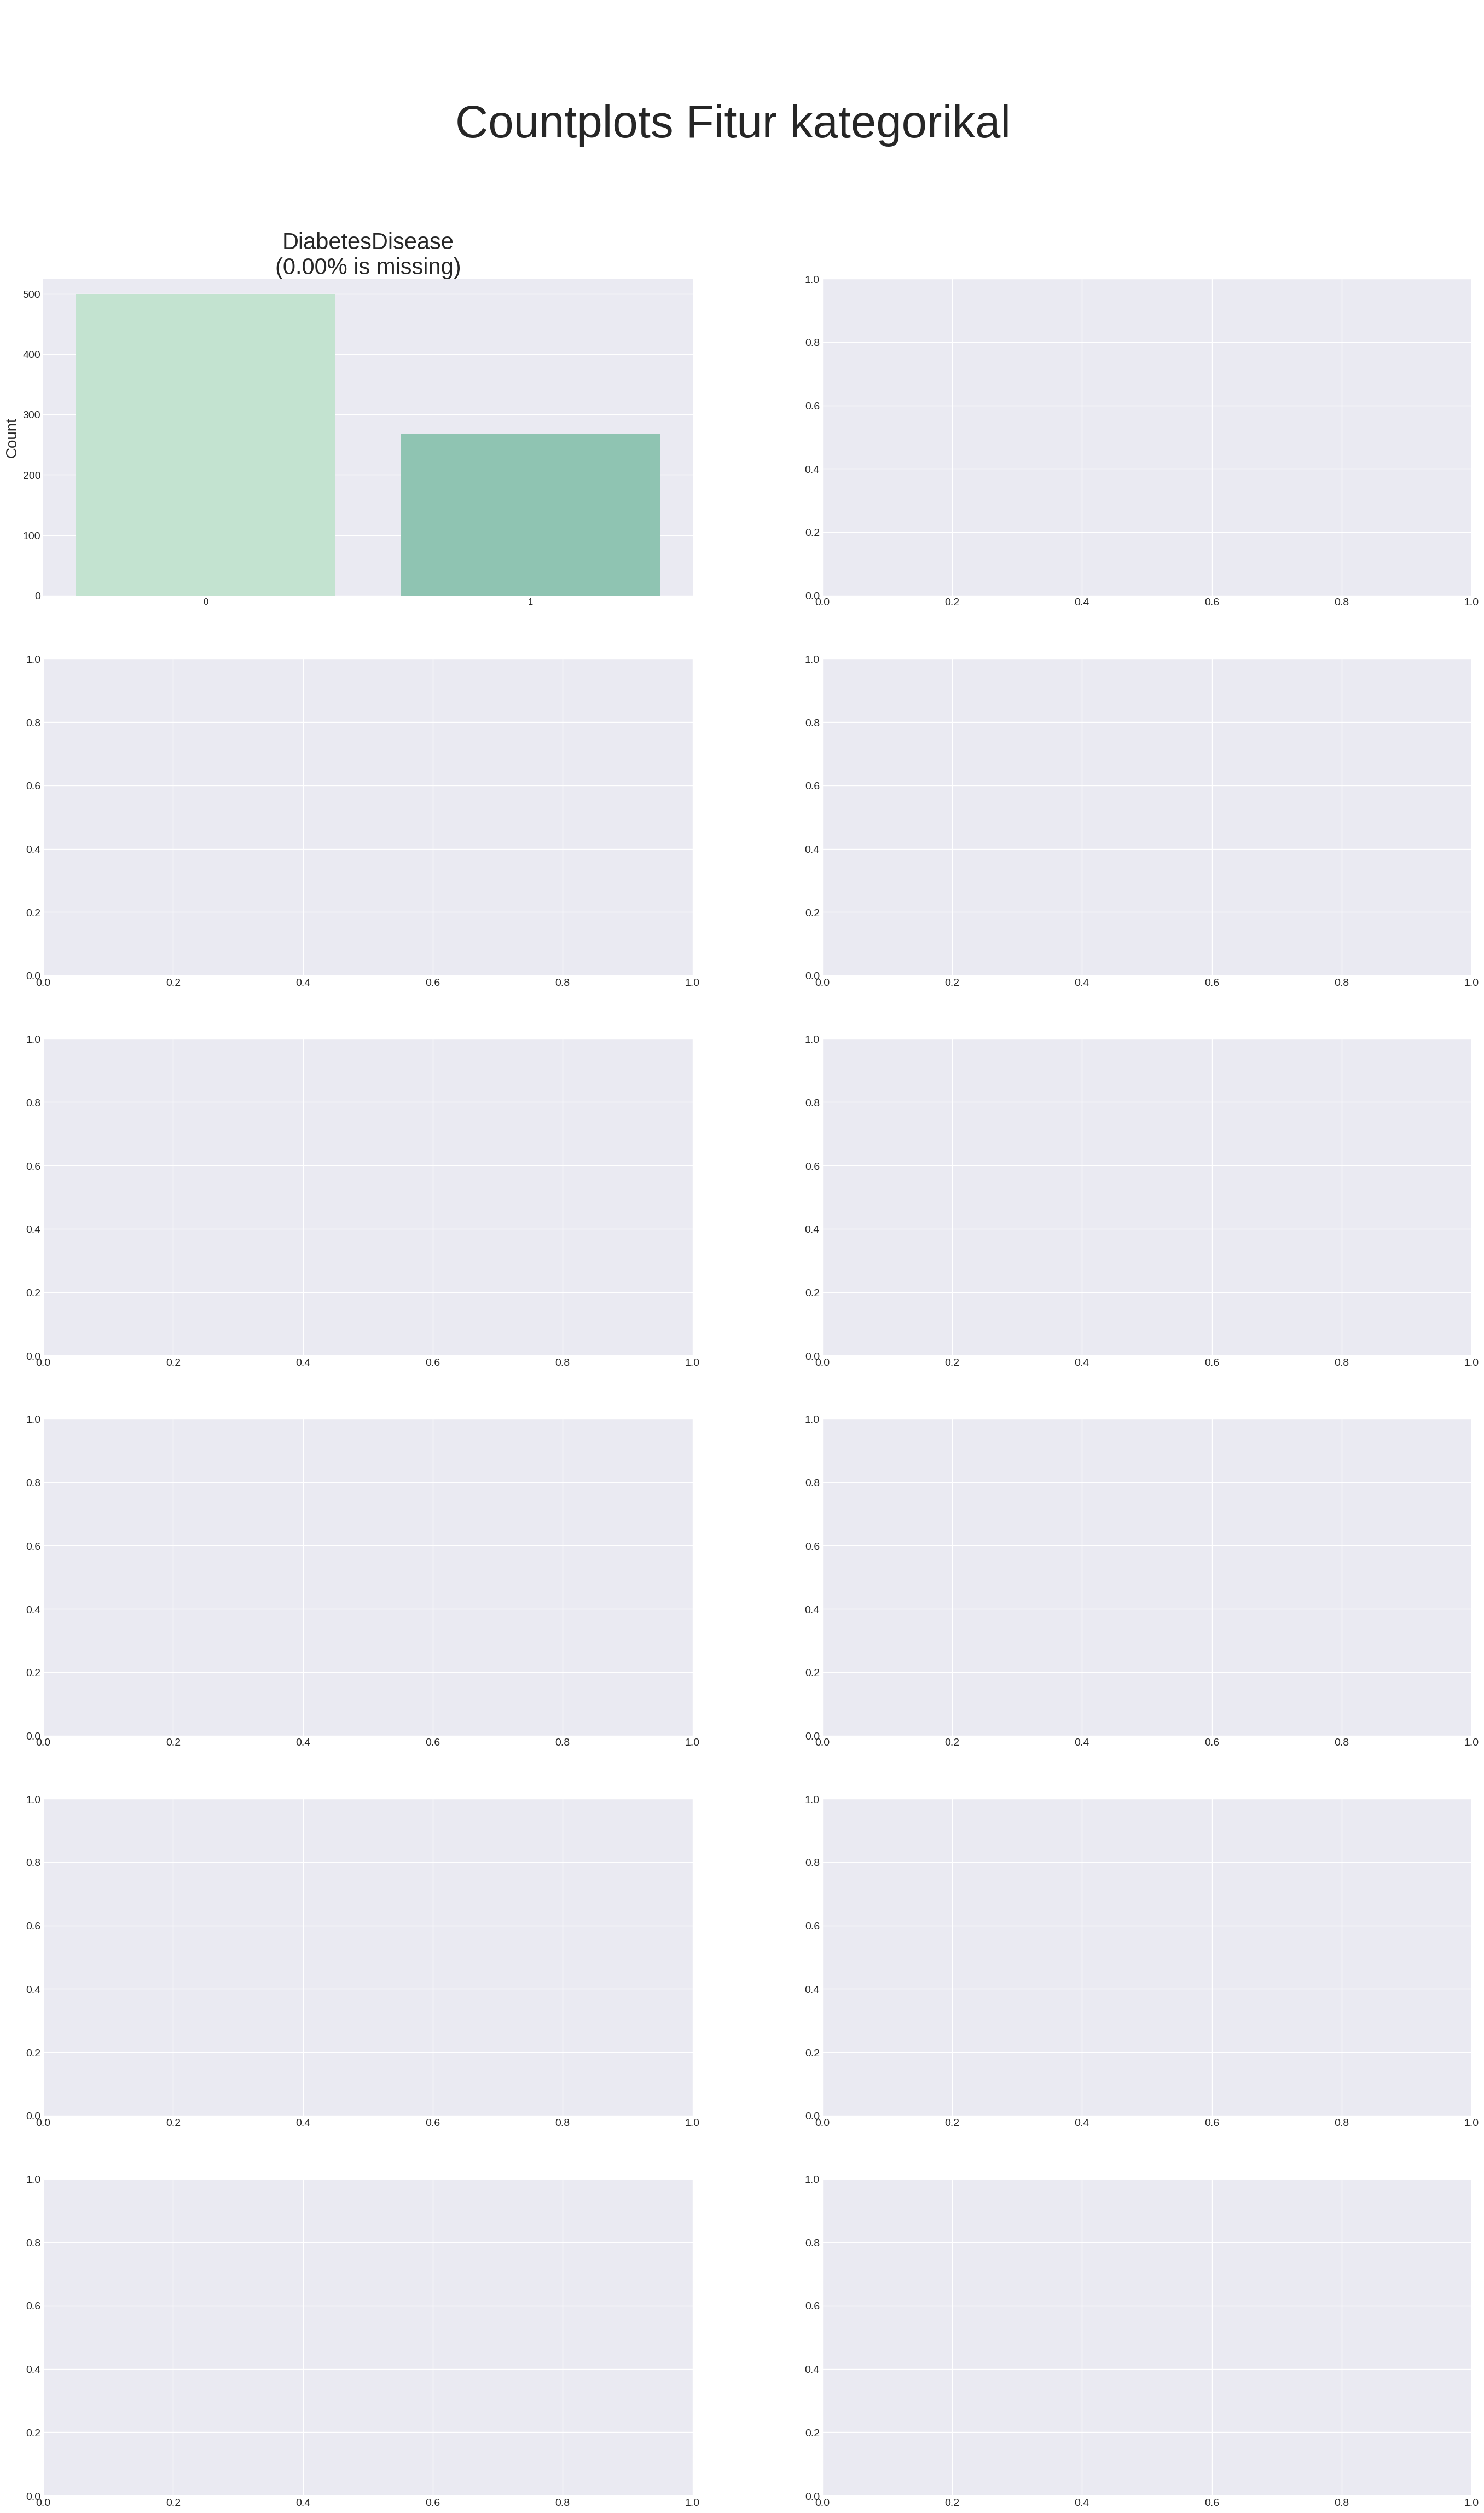

In [ ]:
n_rows, n_cols = (6,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots Fitur kategorikal', fontsize=60)

for index, column in enumerate(categoricals):

    i,j = index // n_cols, index % n_cols

    miss_perc="%.2f"%(100*(1-(data_frame[column].dropna().shape[0])/data_frame.shape[0]))

    collabel=column+"\n({}% is missing)".format(miss_perc)

    fig = sns.countplot(x=column, data=data_frame, label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),

    ax=axes[i,j])

    axes[i,j].set_title(collabel,fontsize=30)

    axes[i,j].set_xlabel(None)

    axes[i,j].set_ylabel("Count",fontsize=20)

    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), fontsize=12)

plt.show()

**distribusi pada data label**

/tmp/ipython-input-3897148164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig=sns.countplot(x=data_frame['DiabetesDisease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
/tmp/ipython-input-3897148164.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  fig=sns.countplot(x=data_frame['DiabetesDisease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))


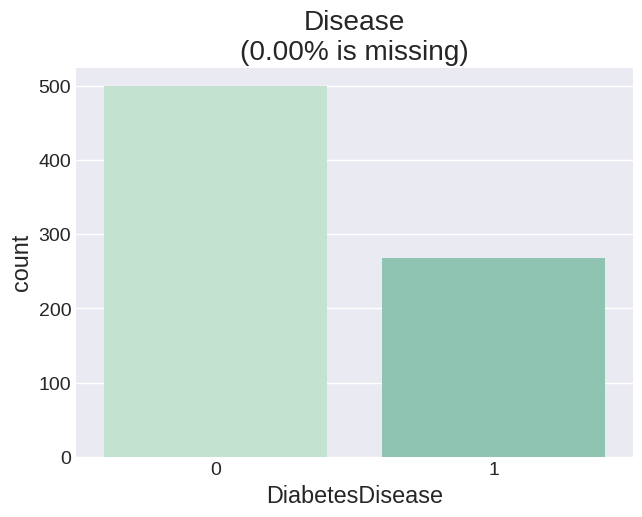

In [ ]:
miss_perc="%.2f"%(100*(1-(data_frame['DiabetesDisease'].dropna().shape[0])/data_frame.shape[0]))

label="Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=data_frame['DiabetesDisease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

**Proporsi missing value**

In [ ]:
style.use('seaborn-v0_8-darkgrid')

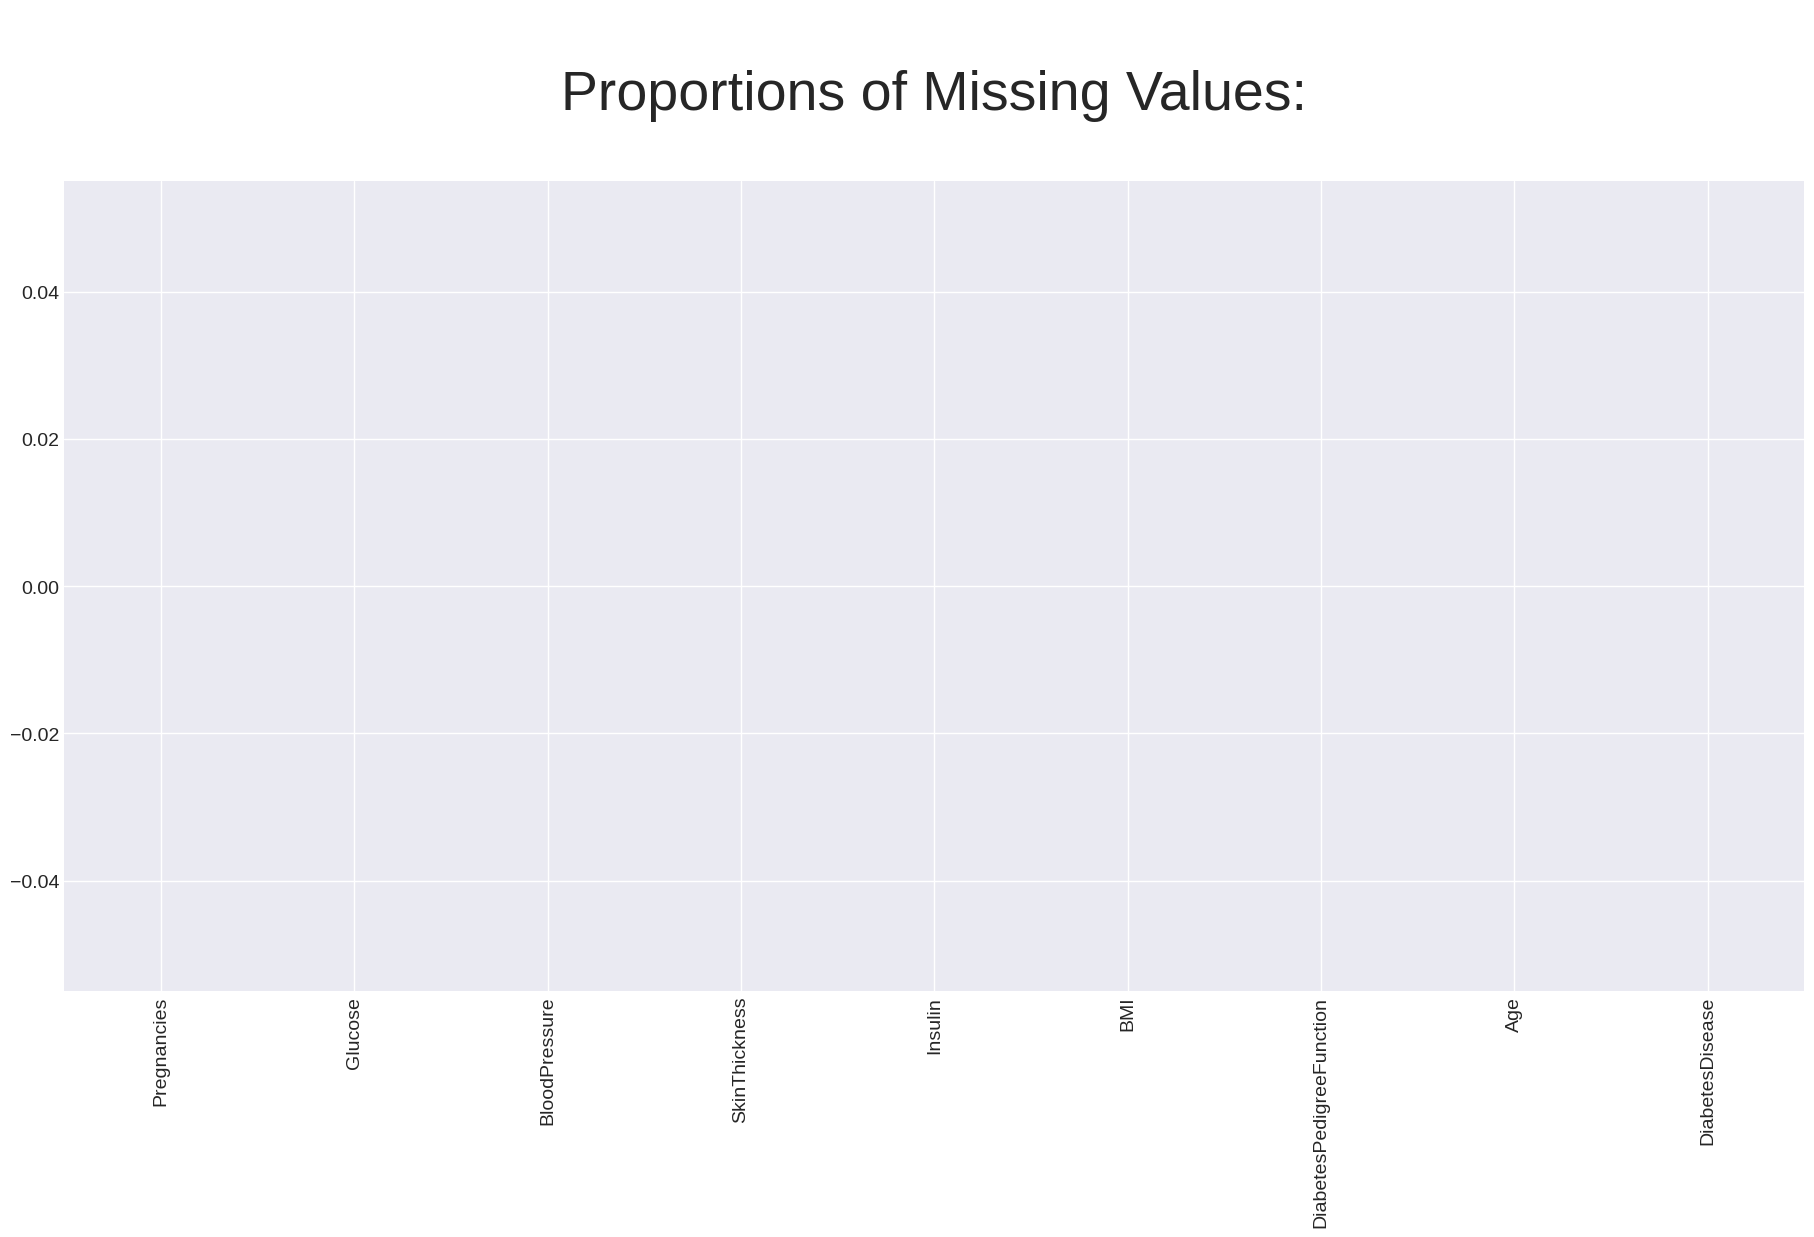

In [ ]:
d=((data_frame.isnull().sum()/data_frame.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

Di sini missing value saya 0 untuk semua column karena dataset saya sudah cukup lengkap

**Mengkodekan fitur kategorikal terlebih dahulu menggunakan One-Hot Encoding.**

In [ ]:
onehotdata = pd.get_dummies(data_frame, drop_first=True, prefix_sep='_', dtype=int)
onehotdata.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesDisease
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


ketika mengencode ada data NaN dalam fitur kategorikal yg terubah menjadi 0. harus dikembalikena ke NaN

In [ ]:
names={}
for name in data_frame.columns:
    for ohname in onehotdata.columns:
        if name+'_' in ohname and name in categoricals:
            names[name]=ohname
            for i in range(200):
                if type(data_frame.loc[i,name])!=str:
                    if math.isnan(data_frame.loc[i,name]):
                        onehotdata.loc[i,ohname]=data_frame.loc[i,name]

onehotdata.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesDisease
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


**Imputation**

**c. melakukan inputasi pada data yg kosong (missing value)**

In [ ]:
def random_sampling(feature):
    random_sample = onehotdata[feature].dropna().sample(onehotdata[feature].isna().sum())
    random_sample.index = onehotdata[onehotdata[feature].isnull()].index
    onehotdata.loc[onehotdata[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = onehotdata[feature].mode()[0]
    onehotdata[feature] = onehotdata[feature].fillna(mode)

In [ ]:
for col in numeric:
    random_sampling(col)

In [ ]:
categoricals=[]
for col in onehotdata.columns:
    if not col in numeric:
        categoricals.append(col)

In [ ]:
for col in categoricals:
    impute_mode(col)

In [ ]:
onehotdata.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesDisease
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


In [ ]:
onehotdata.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
DiabetesDisease,0


**d. remove duplicate**

In [ ]:
onehotdata.drop_duplicates(inplace=True)
onehotdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   DiabetesDisease           768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


tidak ditemukan duplikasi pada data

# **Exploratory Data Analysis (EDA)**

**a. memvisualisasikan variabel target**

<function matplotlib.pyplot.show(close=None, block=None)>

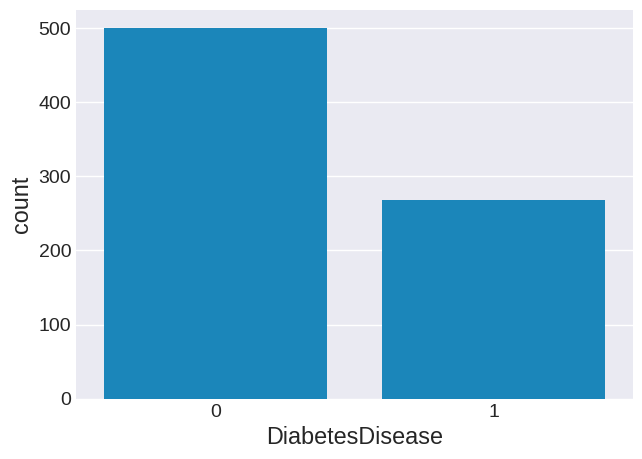

In [ ]:
sns.countplot(x='DiabetesDisease', data=onehotdata)
plt.show

**b. Correlation Heatmap**

<function matplotlib.pyplot.show(close=None, block=None)>

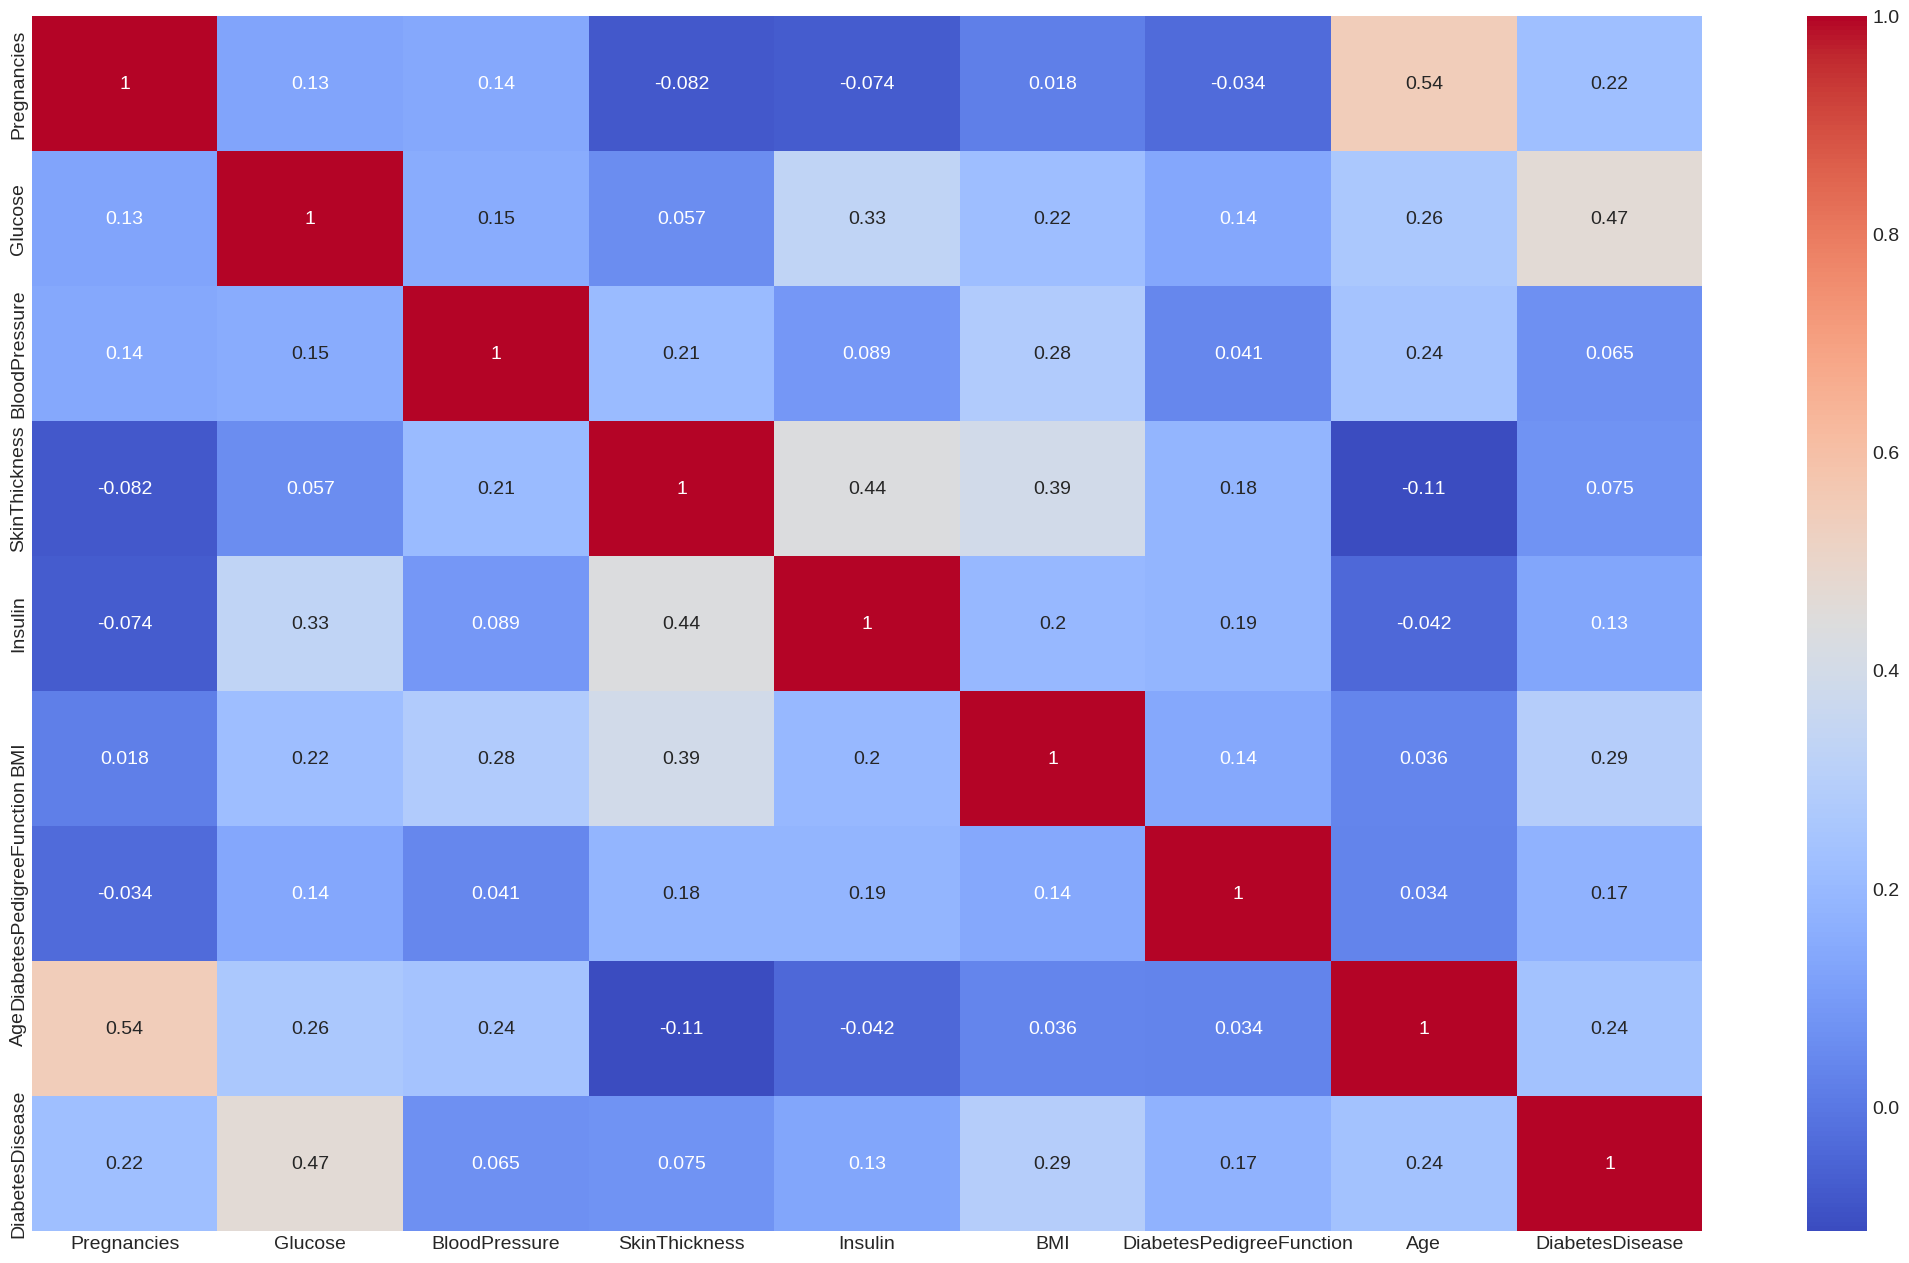

In [ ]:
plt.figure(figsize=(24, 15))
sns.heatmap(onehotdata.corr(), annot=True, cmap='coolwarm')
plt.show

**c. distribusi data/fitur**

<function matplotlib.pyplot.show(close=None, block=None)>

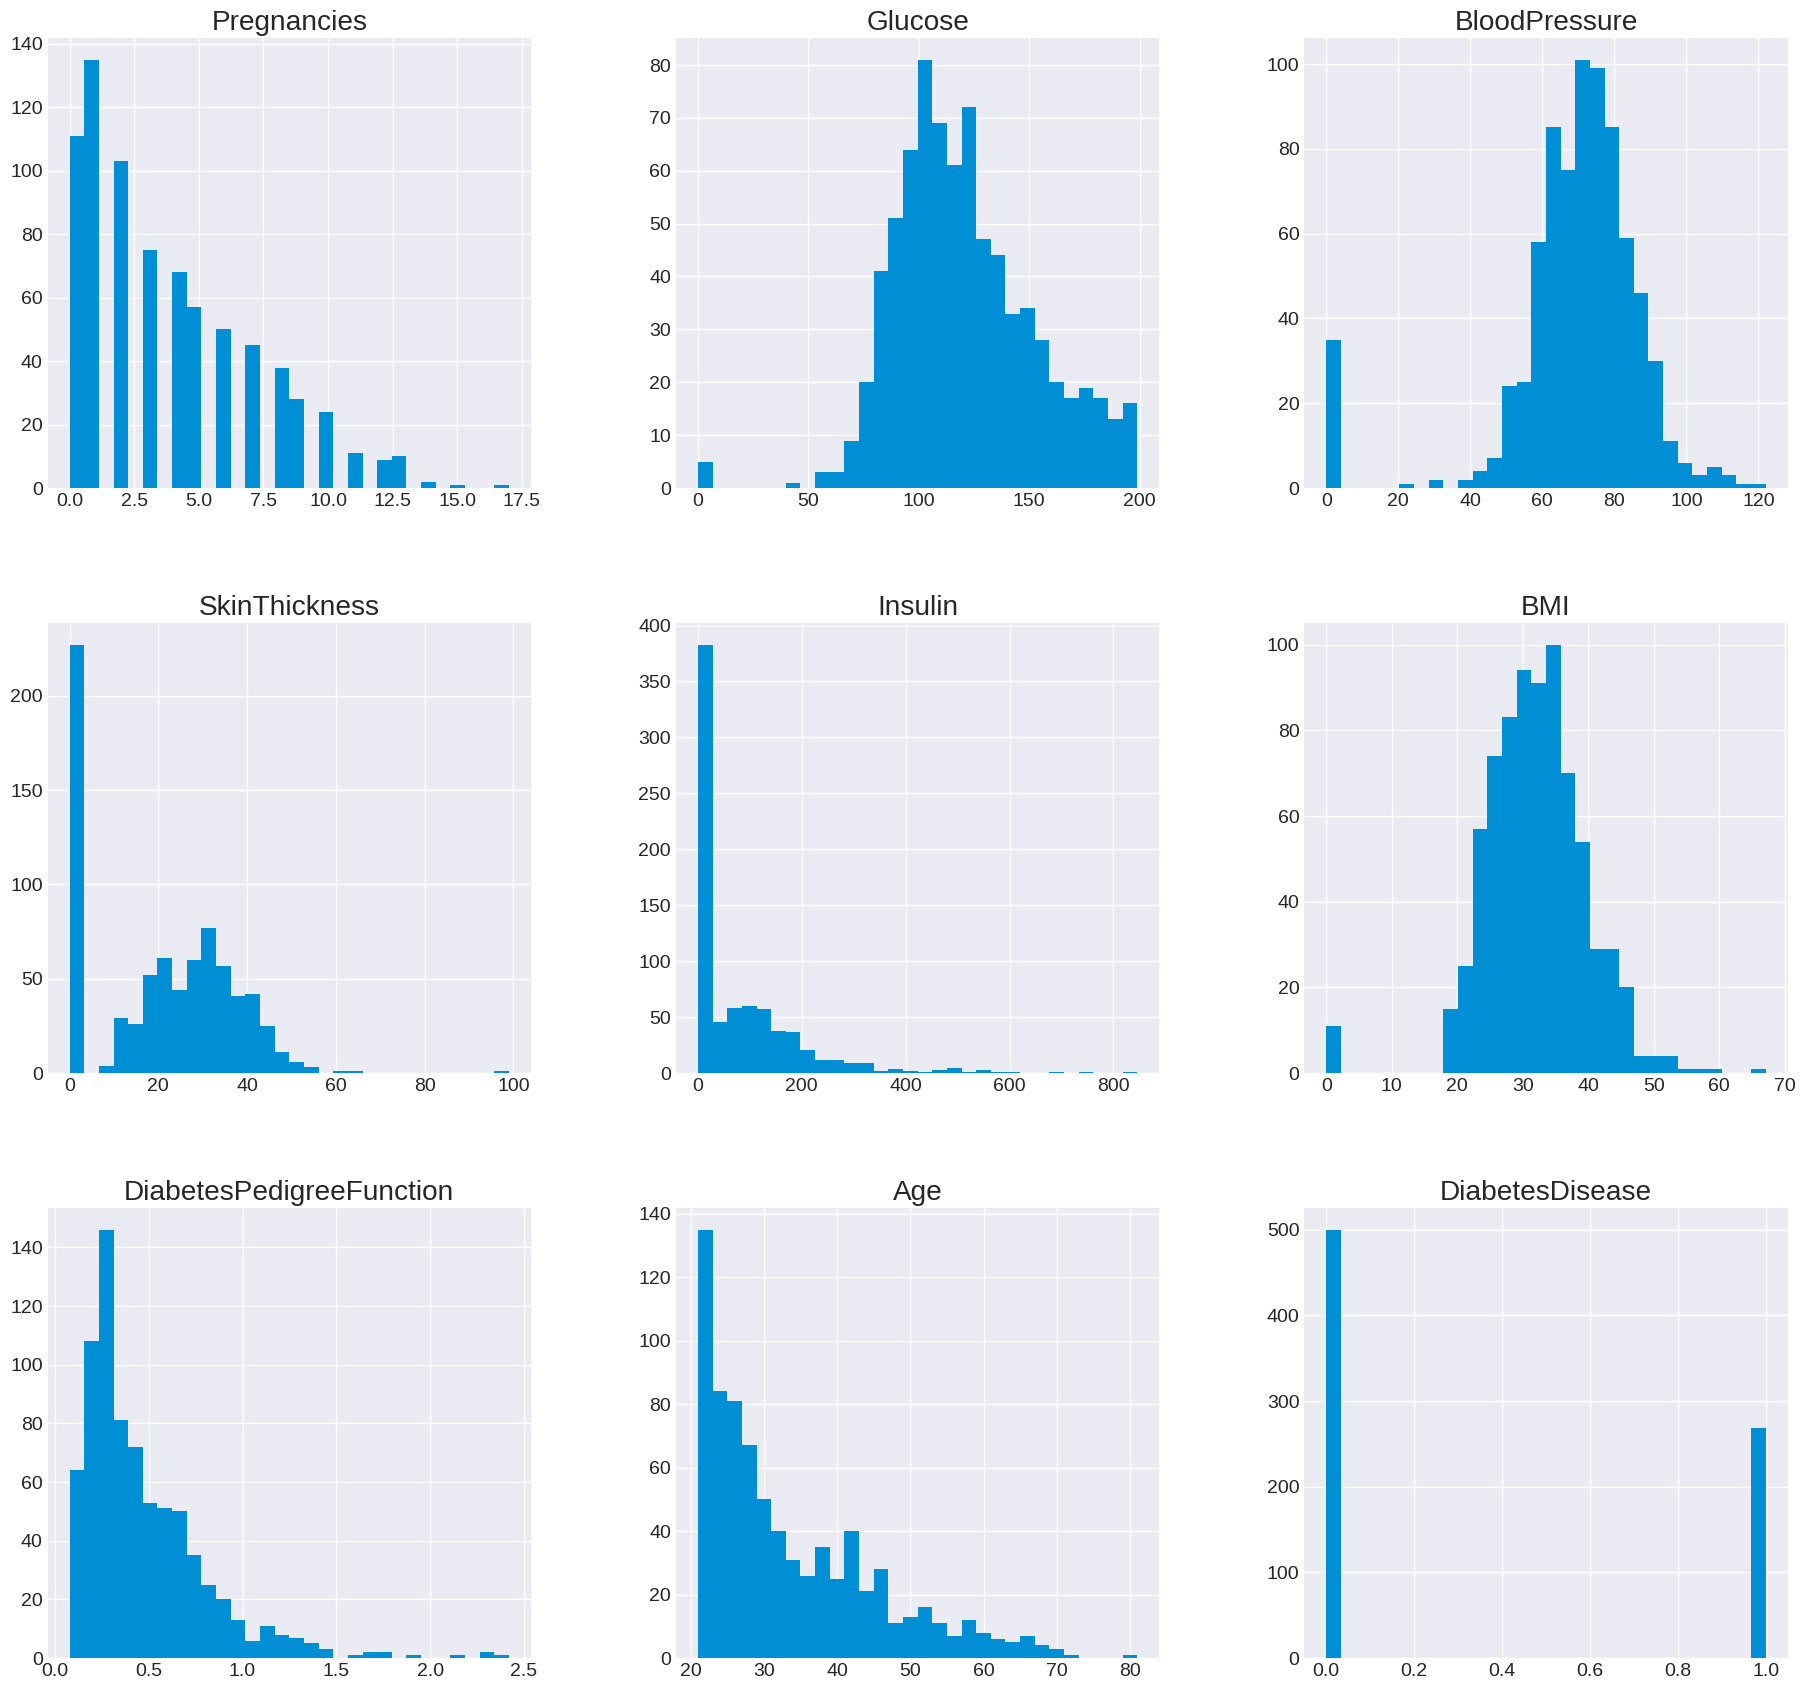

In [ ]:
onehotdata.hist(figsize=(20, 20), bins=30)
plt.show

# **Feature Engineering**

**a. menghapus fitur yang tidak memiliki korelasi dengan label (tidak ada karena semua fitur relevan)**

In [ ]:
onehotdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   DiabetesDisease           768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


**b. Scaling Feature (Opsional)**

In [ ]:
scaler = StandardScaler()
df_without_label = onehotdata.drop('DiabetesDisease', axis=1)
df_scaled = scaler.fit_transform(df_without_label)
df_scaled = pd.DataFrame(df_scaled, columns=df_without_label.columns)
onehotdata[df_without_label.columns] = df_scaled
print(onehotdata.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  DiabetesDisease  
0                  0.468492  1.425995                1  
1                 -0.365061 -0.190672                0  
2                  0.604397 -0.105584                1  
3                 -0.920763 -1.041549                0  
4                  5.484909 -0.020496                1  


**c. data spliting untuk data latih dan uji**

In [ ]:
X = onehotdata.drop('DiabetesDisease', axis=1)
y = onehotdata['DiabetesDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Membuat Model**

**a. melatih model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features="sqrt", min_samples_leaf= 1, min_samples_split= 7, n_estimators= 400)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

**b. prediksi dengan data test**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rand_clf.predict(X_test)
print(y_pred)




[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 0]


# **Evaluasi Model**

**a. Accuracy Score**

In [ ]:
rand_clf_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rand_clf_acc:.2f}")


Accuracy: 0.75


**b. Confusion Matrix**

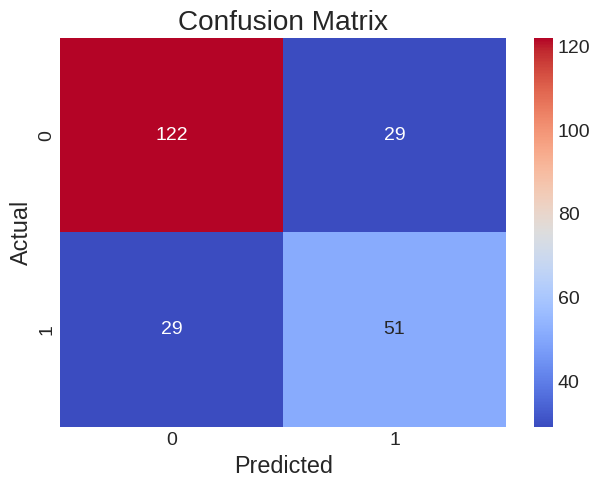

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**c. Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



# **Optimisasi Model (Hyperparameter Tunning)**

a. Optimasi menggunakan GridSearchCV untuk menemukan tuning parameter terbaik

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

onehotdata = pd.get_dummies(data_frame, drop_first=True, prefix_sep='_', dtype=int)

rand_clf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features="sqrt", min_samples_leaf= 1, min_samples_split= 7, n_estimators= 767)

GRID_PARAMETER = {
    'criterion':['gini','entropy'],
    'max_depth':[8,10,12],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[7,9],
    'n_estimators':[100,400,767]
}

X = onehotdata.drop('DiabetesDisease', axis=1)
y = onehotdata['DiabetesDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

grid_search_dtc = GridSearchCV(estimator=rand_clf, param_grid=GRID_PARAMETER, cv=5, scoring='accuracy', verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_split=7,
                                              n_estimators=767),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [7, 9],
                         'n_estimators': [100, 400, 767]},
             scoring='accuracy', verbose=1)

**b. Best parameter dan Accuracy**

In [ ]:
print("Best Parameters:", grid_search_dtc.best_params_)
best_model = grid_search_dtc.best_estimator_

#evaluate model yang telah dioptimalkan
y_pred_optimized = best_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {accuracy_optimized:.2f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 100}
Optimized Accuracy: 0.75


**c. Confusion Matrix dan Classification Report untuk model yang telah dioptimasi**

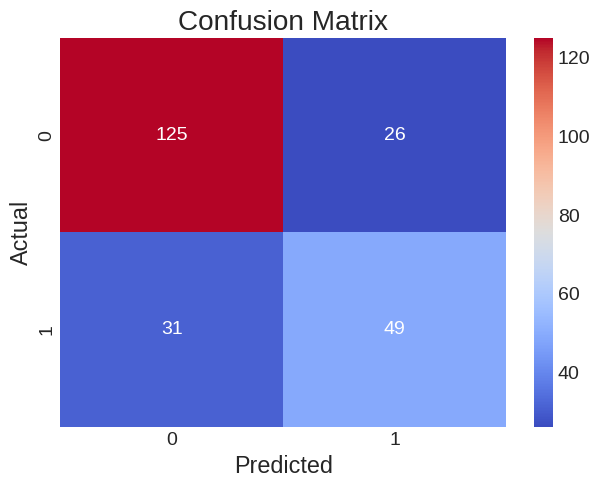

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred_optimized))

akurasi sebelum optimasi dan setelah optimasi adalah 0.75 artinya parameter yang digunakan sebelum proses optimasi parameter sudah masuk dalam kategori parameter optimal